https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# EDA To Prediction (DieTanic)

## Part1 : Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 컬럼별 결측치 확인
- Age, Cabin, Embarked에 각각 177, 687, 2개의 결측치가 포함되어 있음

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 실제 생존율 및 생존자 수

<AxesSubplot:xlabel='Survived', ylabel='count'>

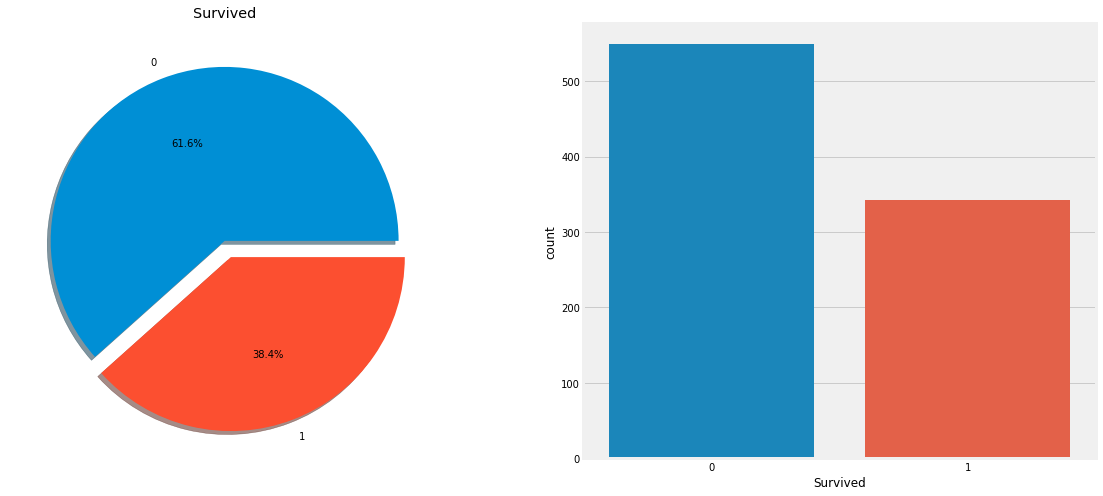

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])

- Survived=1이 생존을 의미하는데, 38.4% 즉, 절반도 안 되는 인원만이 생존했음
- 891 명의 승객(training set) 중 350명 만이 생존
- 아래의 추가적인 분석을 통해 어떤 카테고리/특징을 갖는 승객이 사망했는지 확인해볼 것

## Analysing The Features
## Sex → Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

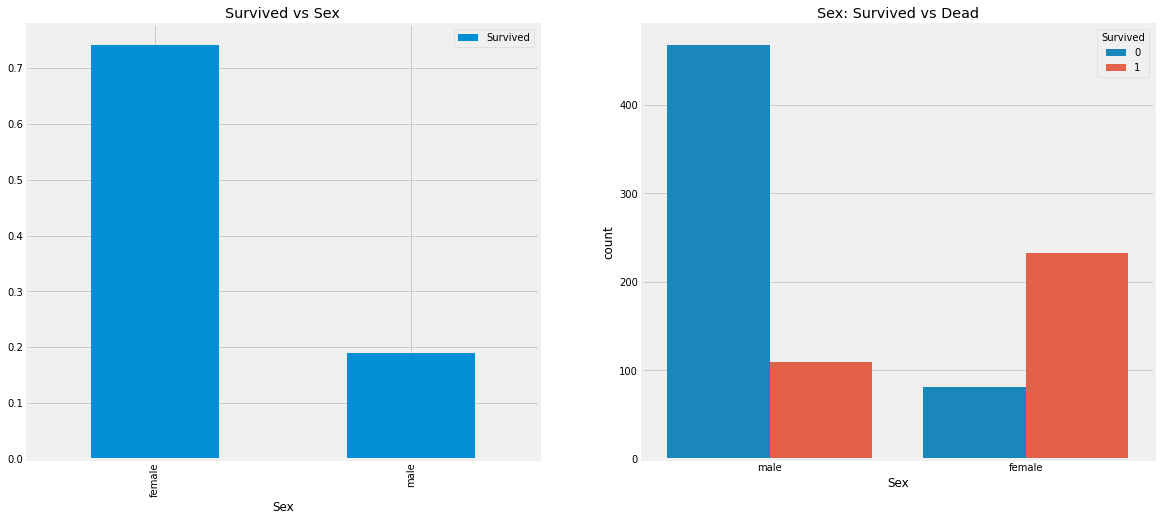

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 남성의 생존율이 약 18-19% 인 것에 비하면, 여성의 생존율은 75% (2배 이상)
- 남성 승객이 훨씬 많음에도 불구하고 생존한 여성 승객이 생존한 남성 승객보다 약 2배 많음

## Pclass → Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


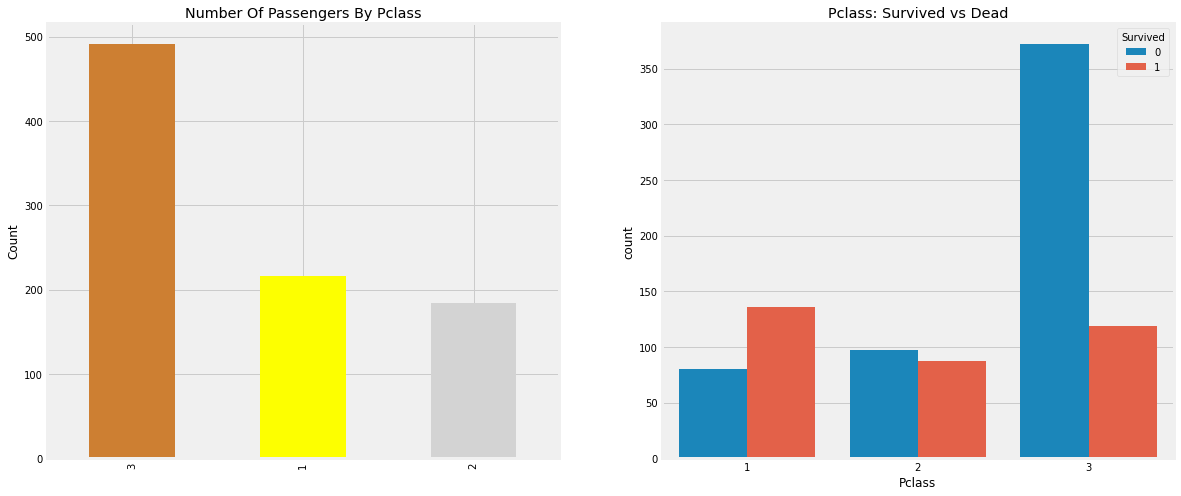

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FDFF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- 오른쪽 차트를 보면 Pclass가 1인 그룹만이 사망보다 생존한 승객이 많음
- Pclass 1의 생존율은 약 63%, Pclass 2는 약 48%, Pclass3은 약 25%로 가장 낮았음
- 이 때문에 Pclass(탑승 요금과 관련된 feature)에 따라 구조 우선순위가 달랐음을 짐작할 수 있음

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

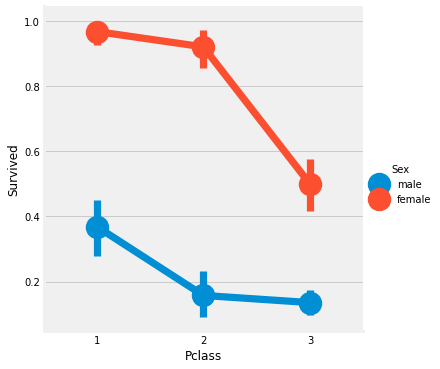

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- factorplot은 카테고리를 분리하기 때문에 카테고리 각각의 값을 살펴보기 좋음
- crosstab, factorplot을 보면 Pclass1에 속한 여성의 경우 생존율이 약 95-96% 정도. 94명 중 3명 만이 사망함
- Pclass와는 무관하게 여성의 생존율이 높은 것으로 보아, 남성보다 여성의 구조 우선순위가 높았음을 짐작할 수 있음
  → Pclass가 1인 경우에도 남성의 생존율이 매우 낮기 때문

## Age → Continuous Feature

In [12]:
print('Oldest Passenger was of: ', data['Age'].max(), ' Years')
print('Youngest Passenger was of: ', data['Age'].min(), ' Years')
print('Average Age on the ship: ', data['Age'].mean(), ' Years')

Oldest Passenger was of:  80.0  Years
Youngest Passenger was of:  0.42  Years
Average Age on the ship:  29.69911764705882  Years


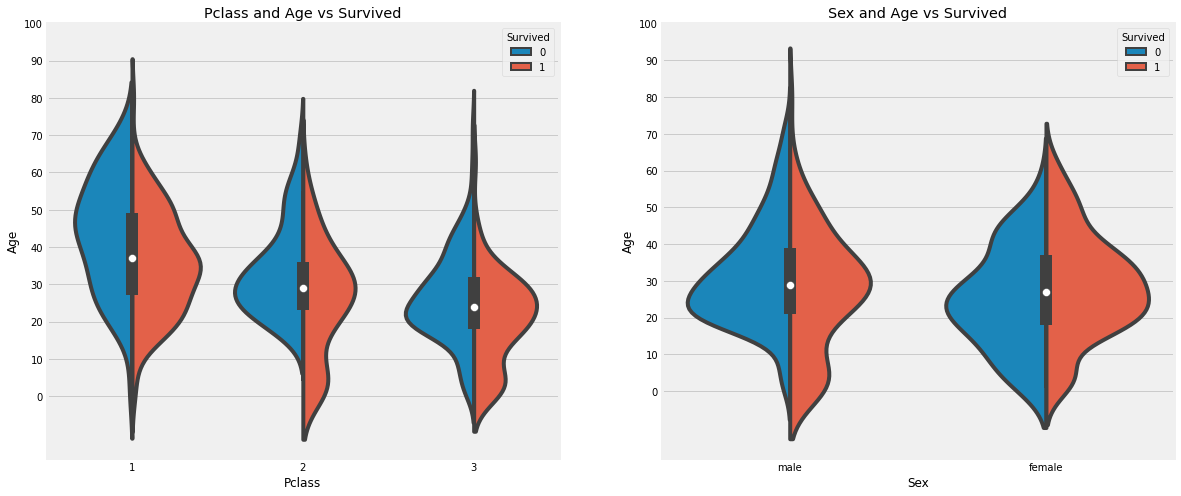

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

#### Observations
- 1) Pclass가 증가할수록 아이들의 수가 많아지고, 나이가 10 이하인 승객의 경우 Pclass와 관계없이 생존율이 높은 편
- 2) Pclass1의 20~50대 승객의 생존율이 높으며, 남성보다 여성이 더 높음
- 3) 남성의 경우, 나이가 많아질수록 생존 확률이 감소함

### 'Age' feature의 결측치 다루기
 - 앞서 살펴봤듯이, 탑승객의 나이 분포는 0~80세로 아주 다양하고, 평균은 약 29.7세임
 - 만약 평균으로 NaN 값을 대체하기에는 오차가 너무 큼
 - 따라서 'Name' feature에서 Initial 값을 추출하여 그룹을 만들고 그에 따른 평균 값으로 NaN 값을 대체하는 방식을 사용

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 남녀가 같은 Initial을 사용하는 경우는 없음. 즉, Initial에 따라 성별 구분이 가능

In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], 
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

- 5개의 그룹(Master, Miss, Mr, Mrs, Other)으로 Initial 값을 통합

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),  'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),  'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any()

False

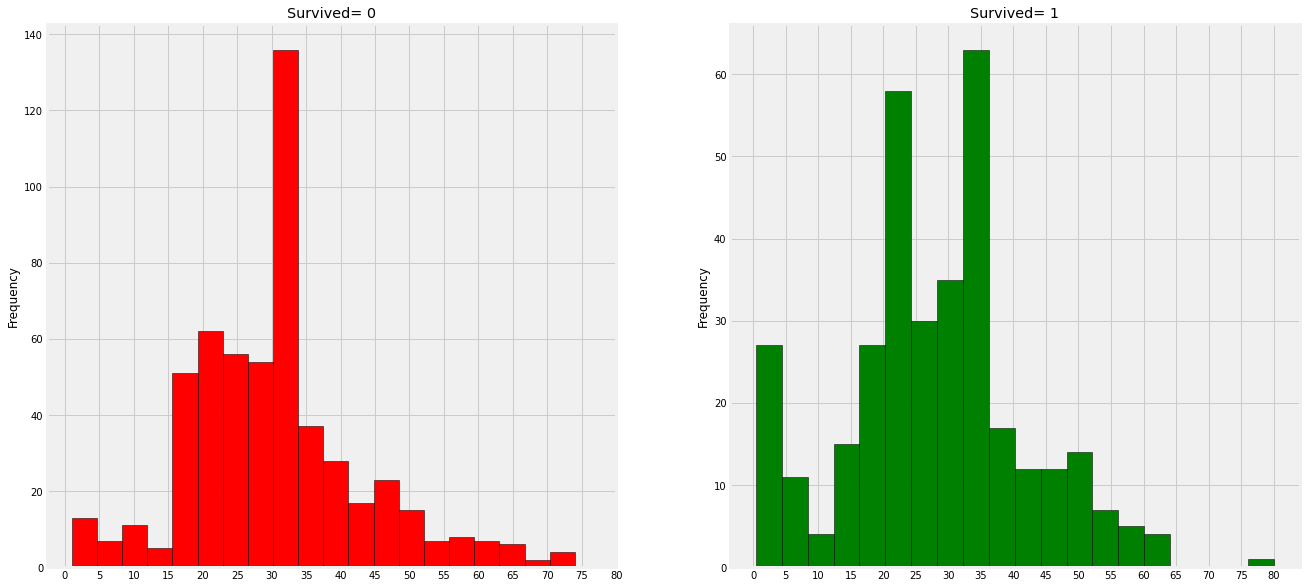

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived= 1')
ax[1].set_xticks(x1)

### Observations
 - 1) 5세 미만의 유아는 많이 구조되는 편
 - 2) 가장 나이가 많은 승객(80세)은 구조됨
 - 3) 30 - 40세의 그룹이 가장 많이 사망함

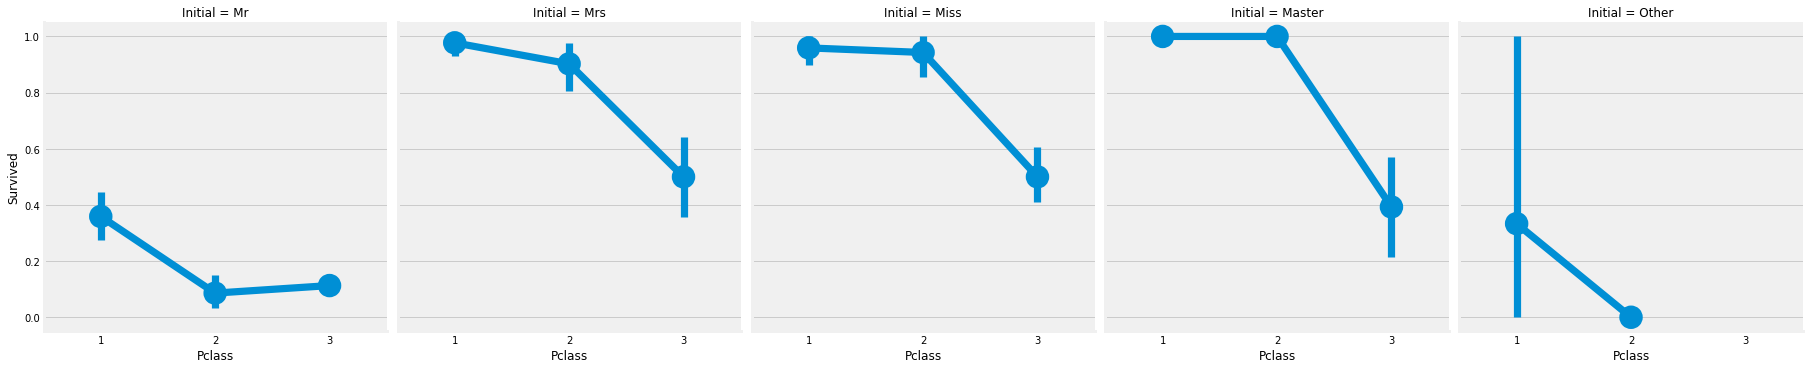

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

- Pclass와는 무관하게 여성과 아이의 구조 우선순위가 높음

## Embarked → Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation
- 탑승 장소에 따라 생존율에 차이가 있는지 확인
- C에서의 생존율이 0.55로 가장 높았으며, S가 가장 낮음

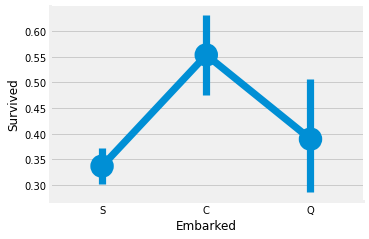

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

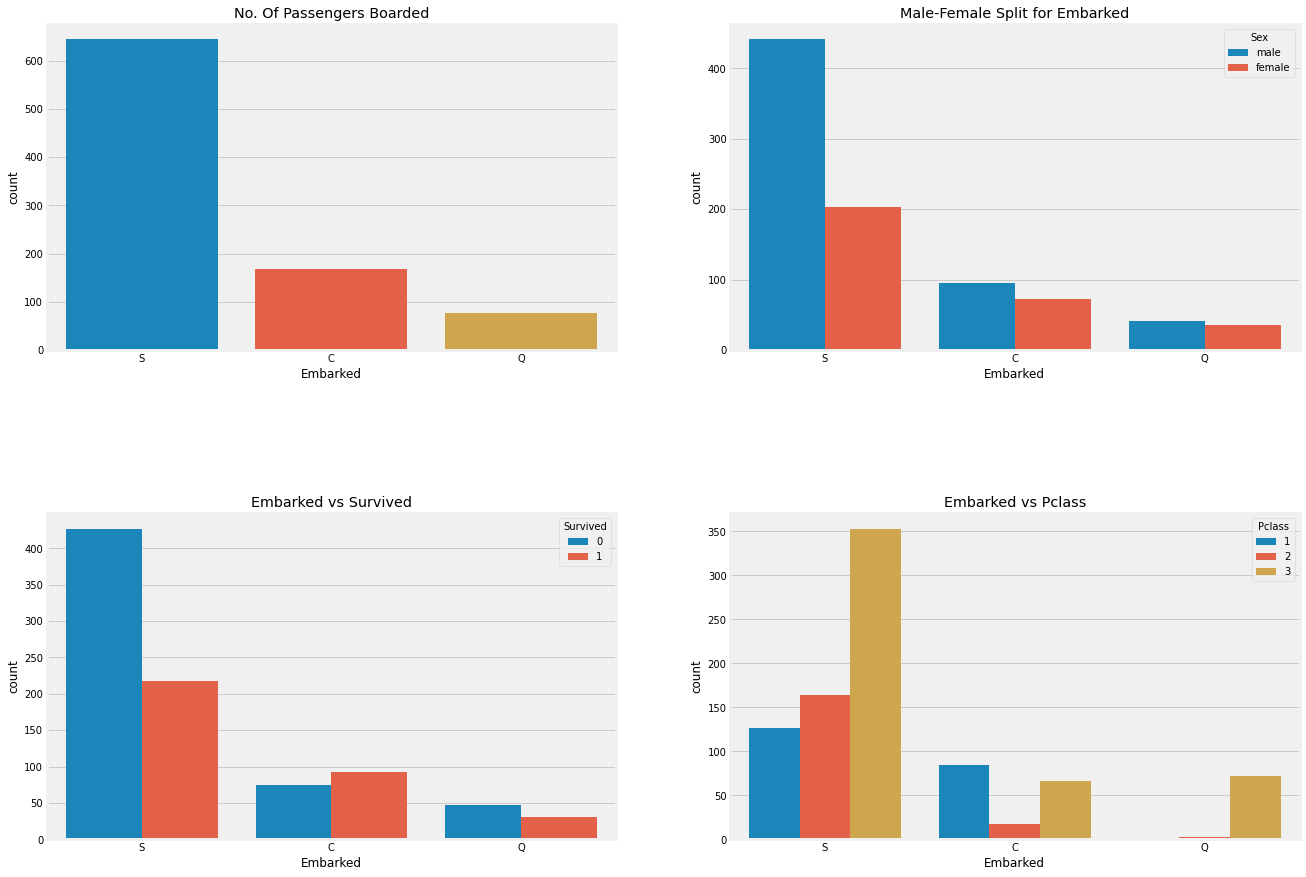

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Observations
 - S에서 탑승한 승객들 대부분이 Pclass 3에 속함
 - C에서 탑승한 승객들은 생존율이 높은 편인데, 이는 (구조 우선순위가 높은) Pclass1, Pclass2가 상대적으로 많이 속해있기 때문
 - 부유층에 속하는 대부분의 승객이 S에서 탑승했지만, Pclass3에 속하는 많은 승객들(81%가 생존 못 함) 또한 S에서 탑승해서 생존율이 낮음
 - Q의 약 95%는 Pclass3에 속하는 승객임

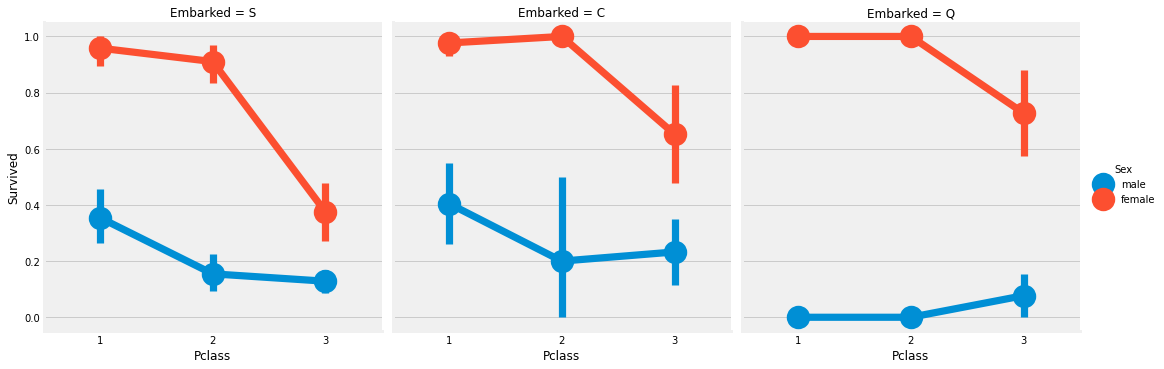

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

#### Observations
- Pclass와는 관계없이 Pclass1, Pclass2인 여성의 경우 생존율이 거의 1에 가까움
- S에서 탑승한 Pclass3의 승객들은 여성과 남성 모두 생존율이 매우 낮음
- Pclass3에 속한 승객이 대부분인 Q에서 탑승한 남성의 생존율이 아주 낮음

### Filling Embarked NaN
- 'Embarked' feature 값 중 결측치를 최빈값인 'S'로 대체

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data.Embarked.isnull().any()

False

## SibSp → Discrete Feature

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


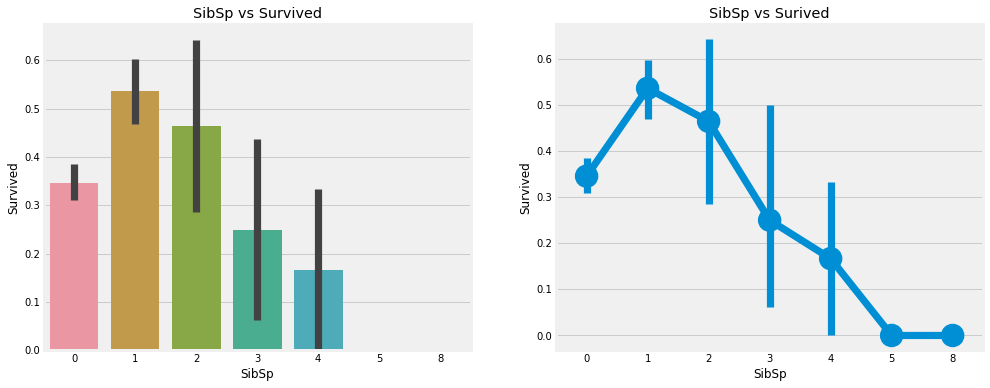

In [29]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Surived')

plt.close(2)
plt.show()

#### observations
- barplot과 pointplot을 통해 형제가 없다면(no siblings), 생존율이 34.5%임을 확인할 수 있음
- 그래프는 형제의 수가 증가하면 생존율이 대략 감소함 → 가족이 있다면, 자신보다는 가족을 우선적으로 구조하려고 했을 것
- 5~8 명으로 구성된 가족은 생존율이 0% → Pclass와 관련됨 crosstab에 따르면 SibSp가 4 이상인 경우 모두 Pclass 3에 해당

## Parch

In [30]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


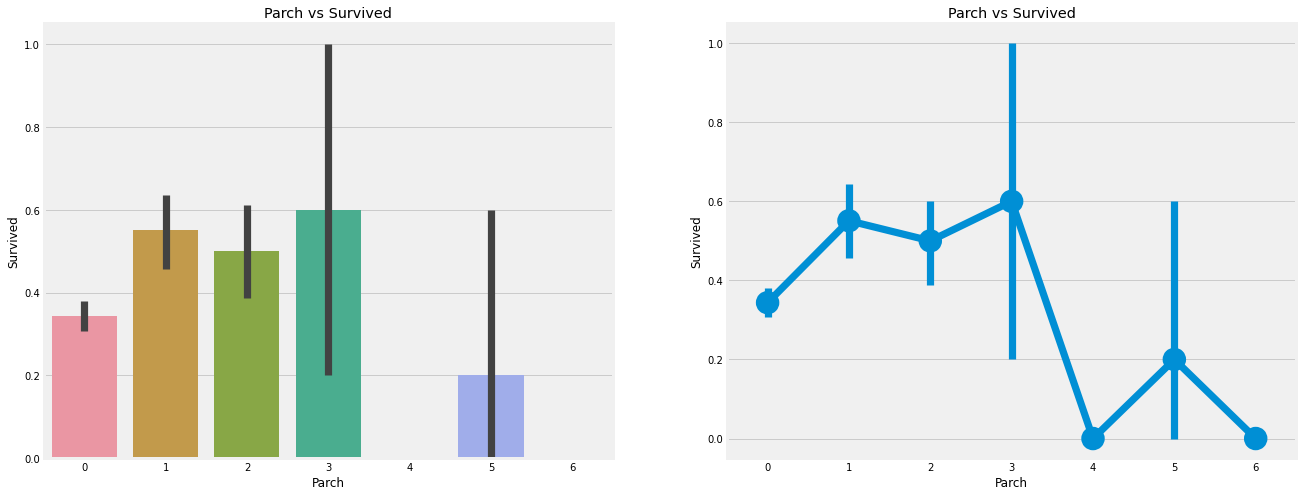

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### observations
- 부모와 함께 탑승한 승객이 생존율이 더 높지만, Parch 값이 증가할수록 생존율은 떨어짐
- Parch 값이 1~3의 경우 생존율이 높았으며, Parch 값이 0(혼자 탑승)이거나 4명 넘을 경우 생존율이 아주 낮음

## Fare → Continuous Feature

In [32]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


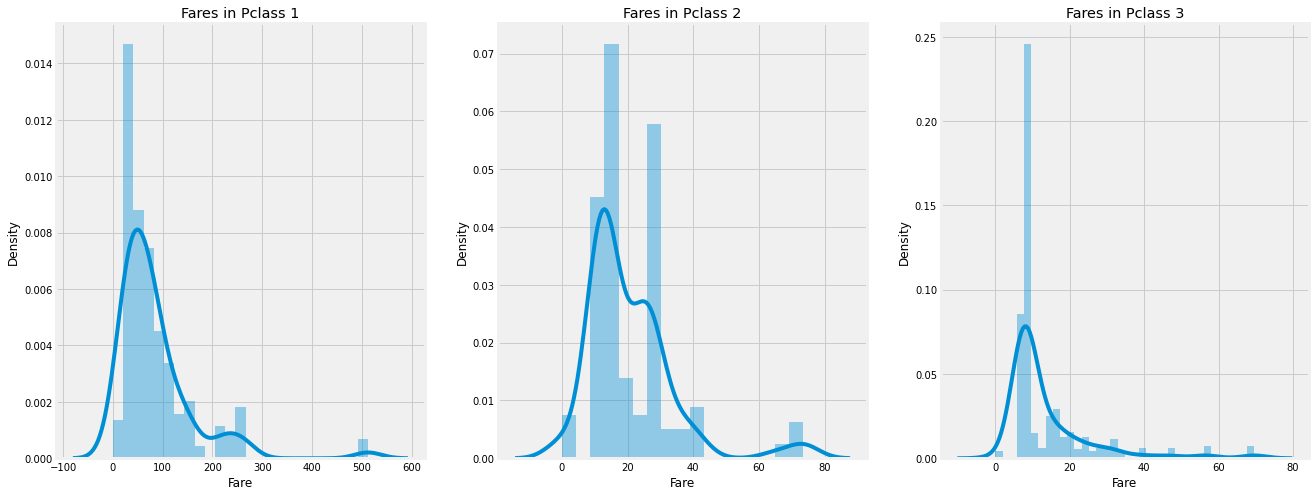

In [33]:
f, ax = plt.subplots(1, 3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Observations in a Nutshell for all features
- Sex : 남성에 비해 여성의 생존율이 높음
- Pclass : 1st class 승객의 생존 확률이 더 높았고, Pclass가 3인 경우 생존율이 아주 낮았음. Pclass가 1인 여성의 경우 생존율이 거의 1에 가까울 정도로 높았으며, Pclass가 2인 여성도 마찬가지임
- Age : 5-10세의 어린이는 생존 확률이 높았고, 15~30세의 승객이 가장 많이 사망함
- Embarked : C의 생존율은 Pclass1의 대부분이 탑승한 S보다 높음(S의 경우 Pclass1이 많이 탔더라도 Pclass3의 승객 또한 많이 탑승함). Q의 승객은 모두 Pclass3에 속함
- Parch + SibSp : SibSp가 1-2, Parch가 1~3인 경우가 혼자 오거나 대가족의 경우보다 생존율이 높았음

## Correlation Between The Features

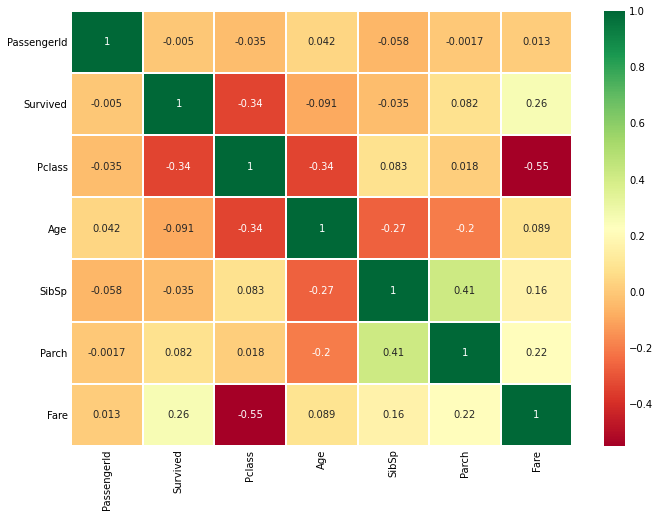

In [34]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)  # data.corr() ---> coorelation marix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Part2: Feature Engineering and Data Cleaning

## Age_band
### Age Feature : Continous -> Categorical

In [35]:
data['Age_band'] = 0 
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


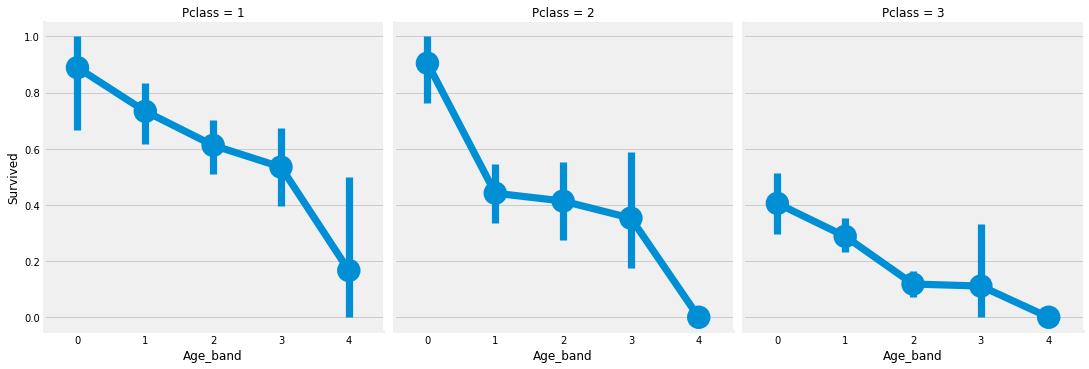

In [37]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### Family_Size and Alone

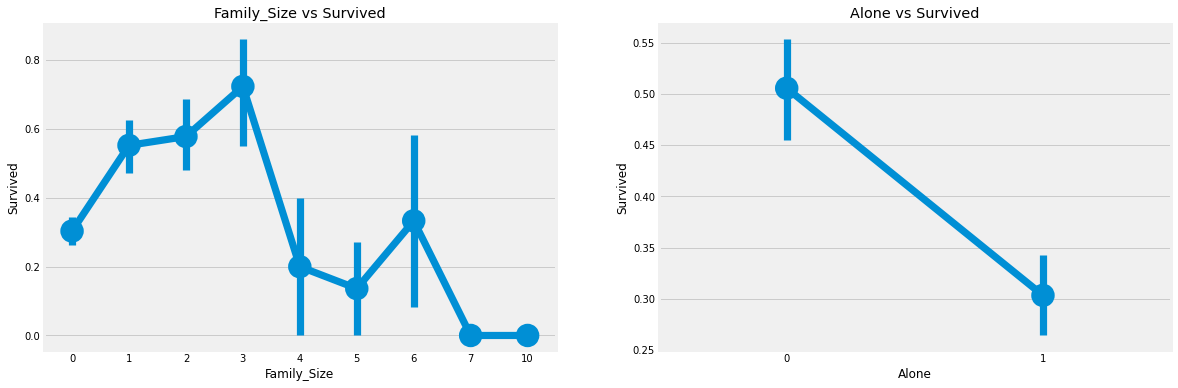

In [38]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

- Family_Size가 0인 승객은 가족 없이 혼자 탑승한 승객을 의미함
- 혼자 탑승한 경우, 생존율이 매우 낮았음. 또한, Family_Size가 5 이상인 경우에도 생존율이 낮아짐

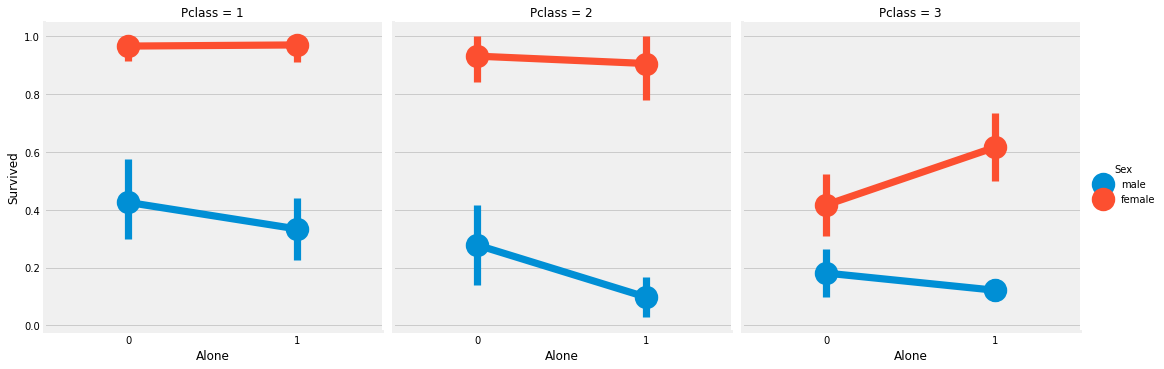

In [39]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

### Fare_Range
- 'Fare' feature는 연속형 변수이기 때문에 ordinal 변수로 바꿔줘야 함. 이때 pandas.qcut를 사용
- qcut은 주어진 수에 따라 변수의 값을 분리하거나 정리(?)함
- 예를 들어, 메소드의 파라미터로 5를 전달하면, 해당 변수를 5개의 범위로 나눔

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- Fare_Range 값 증가하면, 생존율도 증가함
- Fare_Range 값 자체를 분석에 사용할 수 없기 때문에 Age_Band처럼 하나의 값(singleton values)으로 변경

In [41]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 512.329), 'Fare_cat'] = 3

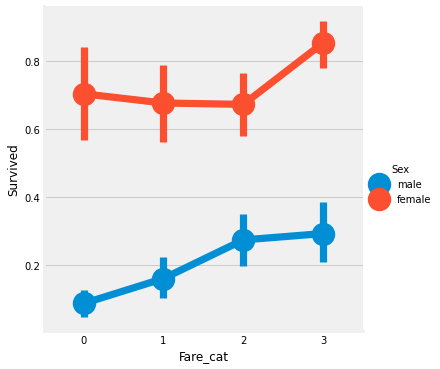

In [42]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

### 문자형 변수를 숫자형 변수로 변환

In [43]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0, 1, 2, 3, 4], inplace=True)

#### 불필요한 Feature 삭제

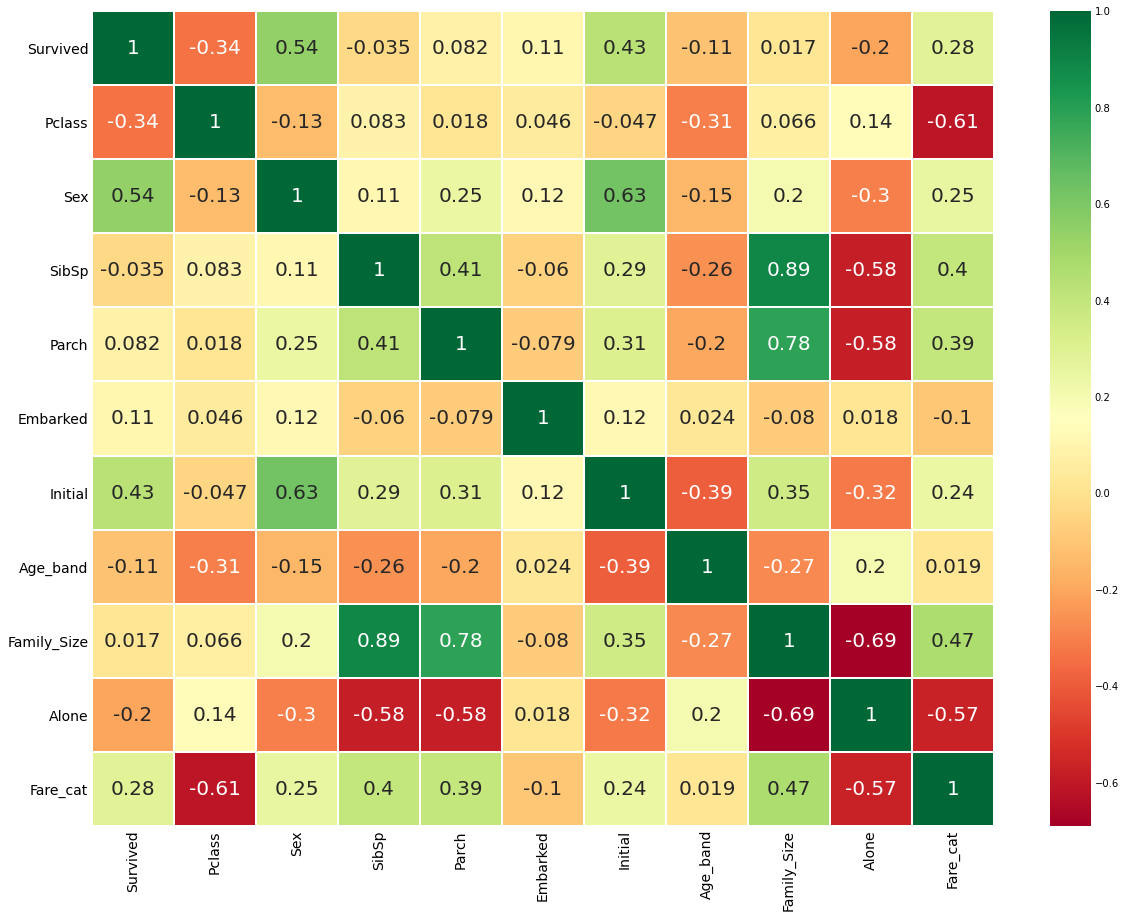

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling
- 1) Logistic Regression
- 2) Support Vector Machines(Linear and raidal)
- 3) Random Forest
- 4) K-Nearest Neighbours
- 5) Naive Bayes
- 6) Decision Tree

In [45]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [46]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [47]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [48]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


### Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is  0.8208955223880597


### Decision Tree

In [50]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is  0.7985074626865671


### K-Nearest Neighbours(KNN)

In [51]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is', metrics.accuracy_score(prediction5, test_Y))

Accuracy for KNN is 0.8283582089552238


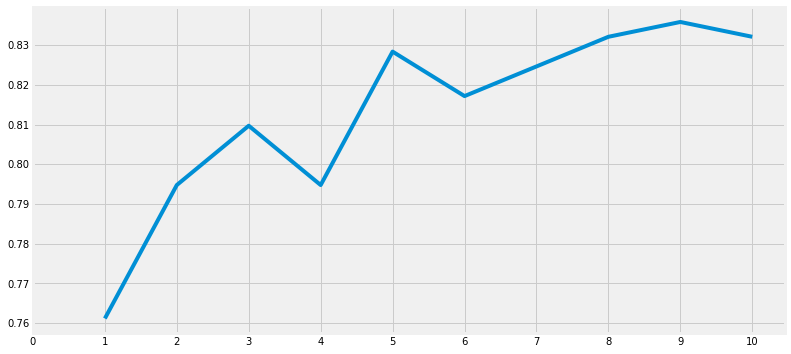

Accracies for different values of n are:  [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955]  with the max value as  0.835820895522388


In [52]:
a_index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accracies for different values of n are: ', a.values, ' with the max value as ', a.values.max())

- KNN의 경우, 파라미터인 n_neighbors의 값에 따라 정확도가 달라짐
- 기본 값은 5이며, 위 결과에선 9일 때 가장 높은 정확도를 보임

### Gaussian Naive Bayes

In [53]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests

In [68]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8097014925373134


- 모델의 정확도는 분류기의 강건성(robustness)에 의해서만 정해지는 것이 아님
- 만약 분류기가 훈련 데이터로 훈련되고, 테스트 데이터로 테스트된 후 90%의 정확도를 보였다고 가정했을 때, 새로운 테스트 데이터에 대해서도 90%의 정확도를 보인다고 확신할 수 없음. 훈련 데이터와 테스트 데이터가 바뀌면 정확도 또한 바뀔 수 밖에 없음. 이를 'model variance'라고 함

## Cross Validation
- 많은 경우, 데이터가 불균형할 수 있으므로, 데이터 셋의 each & every 인스턴스를 훈련시키고 테스트해야 함
- 1) K-Fold cross validation은 데이터셋을 k개의 subset으로 나눔
- 2) k=5라고 했을 때, 데이터 셋을 1개의 testing 파트, 4개의 training 파트로 나누게 됨
- 3) 각 iteration마다 데이터 셋 파트를 바꾸면서 알고리즘을 testing하고 training 함
- 4) 이러한 방식으로 데이터 셋을 바꾸게 되면, 과대적합(overfit)이나 과소적합(underfit)을 방지할 수 있음

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#kfold = KFold(n_splits=10, random_state=22)
kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.803596,0.024186
KNN,0.812659,0.041477
Decision Tree,0.808115,0.028348
Naive Bayes,0.799139,0.028757
Random Forest,0.810375,0.034638


<AxesSubplot:>

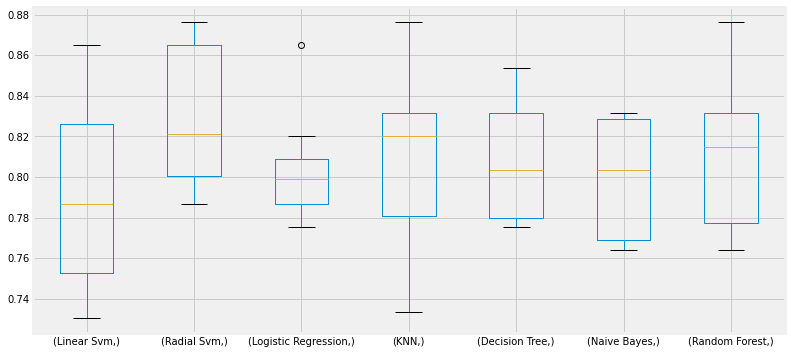

In [55]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

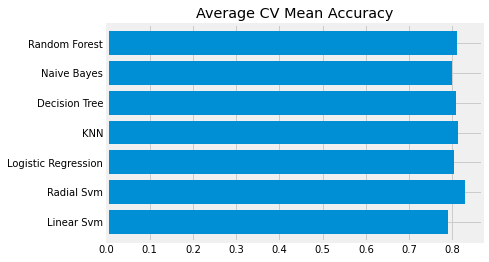

In [56]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fit = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

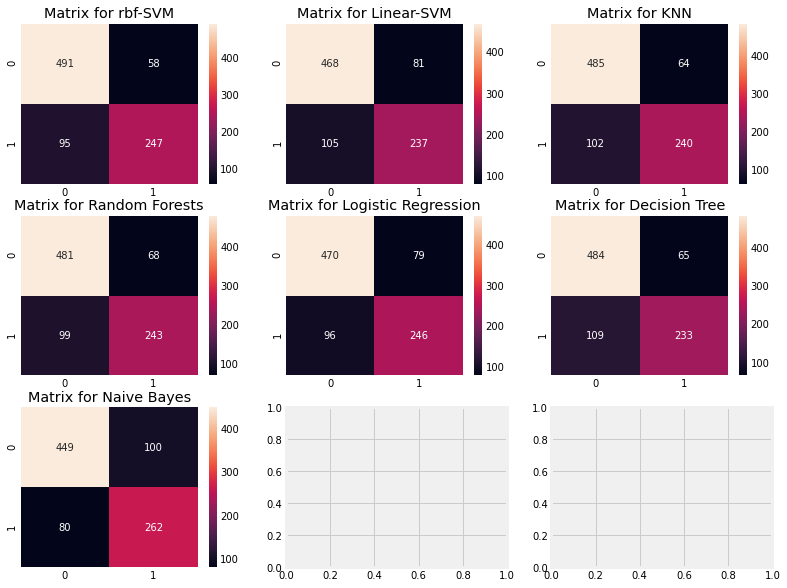

In [57]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
- 왼쪽 대각선은 각 클래스가 정확히 예측한 개수, 오른쪽 대각선은 잘못 예측한 개수를 의미
- 첫 번째 결과인 rbf-SVM 살펴보기
- 1) 정확히 예측한 경우는 (491(dead) + 247(survived)) / 891 = 82.8%의 정확도를 보임
- 2) 잘못 분류한 경우는 58(사망한 사람을 생존한걸로), 95(생존한 사람을 사망한걸로) 였음
- 모든 지표를 봤을 때, rbf-SVM이 승객의 사망 여부를 정확히 예측할 확률이 높음. 반면, Naive Bayes가 생존 여부를 정확히 예측할 확률 높음

### Hyper-Parameters Tuning
- 머신러닝 모델에 사용되는 디폴트 파라미터의 경우, 값을 조정하면서 모델의 정확도를 더 높일 수 있음
- SVM 모델의 경우 C와 gamma가 이에 해당
- 파라미터 조정을 통해 알고리즘의 학습률을 변경할 수 있음 → "하이퍼파라미터 튜닝"

### SVM
- C=0.6, gamma=0.1일 때, 가장 높은 정확도인 82.82% 얻을 수 있음

In [58]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
# verbose : GridSearchCV의 iteration시마다 수행 결과 메시지(log) 출력
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


### Random Forests
- n_estimators=900일 때, 가장 높은 정확도 81.8%

In [59]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


### Voting Classifier
- 여러 머신러닝 모델의 예측 결과를 조합하기 위한 방법
- voting classifier를 통해 모든 submodel의 예측 결과에 기반을 둔 평균 예측 값을 얻을 수 있음

In [60]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))],
                                   voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is  0.8246268656716418
The cross validated score is  0.8237952559300874


### Bagging
- Bagging은 앙상블 방법 중 하나로, 데이터 셋의 일부에 비슷한 분류기를 적용하고 이에 따른 예측 결과를 얻는 방식으로 동작
- "병렬로 복원 추출"
- 평균 값을 얻기 때문에 variance(분산)가 적음
- → 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 높은 bias의 underfitting 문제나, 높은 variance로 인한 overfitting 문제를 해결하는데 도움을 줌

#### Bagged KNN
- Bagging은 높은 분산을 갖는 모델에 적합함. 예를 들면, 결정 트리나 랜덤 포레스트가 있음
- 또한, KNN을 사용할 수도 있는데, 이때 n_neighbours의 값을 작게 설정함

In [61]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is ', result.mean())

The accuracy for bagged KNN is  0.835820895522388
The cross validated score for bagged KNN is  0.8171660424469414


#### Bagged DecisionTree

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is ', result.mean())

### Boosting
- Boosting 역시 앙상블 기법 중 하나로, 분류기의 연속적인 학습을 사용함
- 앞서 예측한 분류기가 틀린 부분에 있어 가중치를 부여 → 가중치를 부여해서 틀린 부분을 더 잘 맞출 수 있또록
- 약한 검출기(weak classifier)들을 여러 개 모아 강한 검출기를 생성하는 방법
- 즉, 다음 단계의 weak classifier는 이전 단계의 weak classifier의 영향을 받게 되고, 이전의 양상을 본 뒤에 잘 맞출 수 있는 방향으로 다음 단계를 진행하며 weight 등을 업데이트하는 방식

#### AdaBoost(Adaptive Boosting)
- "adaptive" boosting인 이유는, 이전 분류기가 틀린 부분을 adaptive하게 바꿔가며 잘못 분류되는 데이터에 집중하는 방식이기 때문
- 이전 분류기의 실행 결과 틀린 부분에 가중치를 부여해 나아감. 최종적으로는 이를 합쳐 복잡하게 생성된 경계들을 통해 훨씬 더 정확한 예측을 수행하게 됨
- 여기서 weak learner 혹은 estimator는 decision tree를 의미

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Adaboost is ', result.mean())

The cross validated score for Adaboost is  0.8271660424469414


#### Stochastic Gradint Boosting
- Gradient Boosting도 Adaboost와 거의 비슷한 메커니즘을 가짐
- 즉, 일반적인 머신러닝 앙상블의 부스팅과 동일하게 weak learner를 결합하고 틀린 것에 가중치를 부여해서 보다 좋은 strong learner를 만드는 방식임
- 차이점은 가중치를 부여하는 방식. 여기서 Gradient Descent(경사하강법)를 사용함
- 경사하강법은 손실 함수를 정량화해주는 역할을 하는데, 손실함수를 파라미터로 미분해서 기울기를 구하고, 이 손실(loss) 값이 작아지는 방향으로 파라미터를 움직이게 하는 방법
- 즉, Gradient Boosting에선 Gradient가 현재까지 학습된 classifier의 약점을 알려주고, 이후 모델이 그것을 중심으로 해서 보완하는 방식

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is ', result.mean())

The cross validated score for Gradient Boosting is  0.8137827715355804


#### XGBoost

In [66]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1, eval_metric='logloss')
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is ', result.mean())

The cross validated score for XGBoost is  0.8216229712858926


#### Hyper-Parameter Tuning for AdaBoost
- 가장 높은 정확도를 보인 AdaBoost에 대해 하이퍼 파라미터 튜닝을 진행
- n_estimators=200, learning_rate=0.05일 때, 정확도가 83.16%로 가장 높았음

In [71]:
n_estimators = list(range(100,1000,100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


### Confusion Matrix for the Best Model

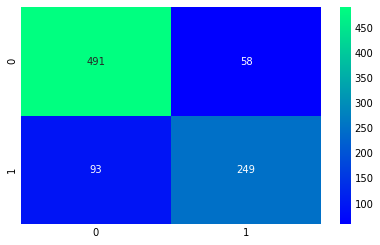

In [72]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

[11:07:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


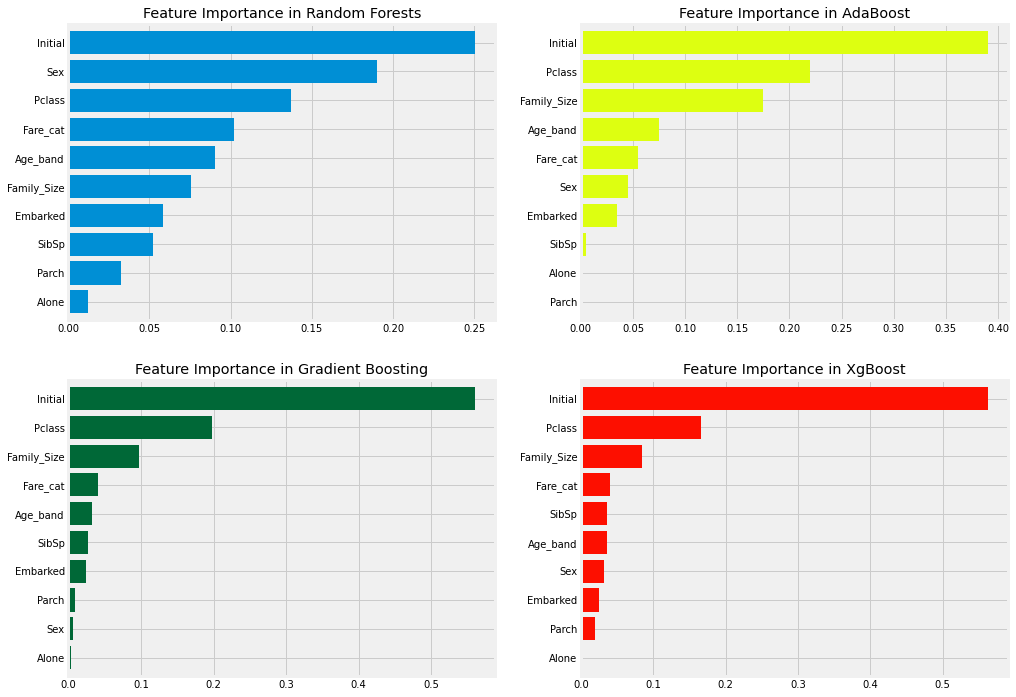

In [74]:
f, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

#### observations
- 공통된 주요 feature 로는 Initial, Fare_cat, Pclass, Family_Size가 있음
- 이전 분석에서 'Pclass' feature를 결합한 'Sex' feature는 차별화된 factor라고 생각했는데, RandomForest를 제외한 다른 분류기에서 'Sex' feature는 그닥 중요하지 않아보임
- 하지만 모든 분류기에서 첫 번째로 importance를 갖는 'Initial' feature는 'Sex' feature와 양의 상관관계를 갖고, 둘 다 성별에 관련된 feature임
- 유사하게 'Pclass'와 'Fare_cat', 'Famil_Size'처럼 승객의 상태를 가리키는 feature들이 상위권에 랭크되어 있음